Este colab fue adaptado por Arnold Charry Armero.

# El Algoritmo de Dijkstra

El algoritmo de Dijkstra consiste en evaluar todas las conexiones para darles un valor temporal y un valor fijo. Dependiendo de la cantidad mínima de pasos entre el nodo de inicio y el nodo final es que se escoge la ruta óptima. Primero se evalúa uno por uno para después escoger la ruta óptima. El código para este algoritmo es el que se encuentra a continuación.

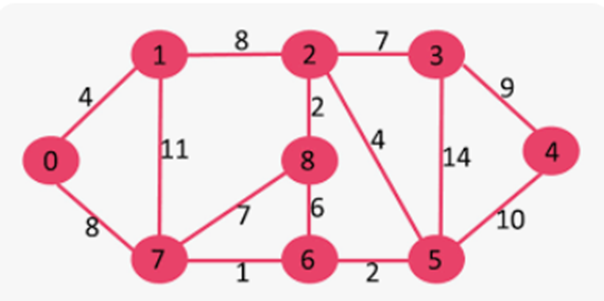

In [ ]:
class Graph:
    def __init__(self, size):
        self.adj_matrix = [[0] * size for _ in range(size)]
        self.size = size
        self.vertex_data = [''] * size

    def add_edge(self, u, v, weight):
        if 0 <= u < self.size and 0 <= v < self.size:
            self.adj_matrix[u][v] = weight
            self.adj_matrix[v][u] = weight  # For undirected graph

    def add_vertex_data(self, vertex, data):
        if 0 <= vertex < self.size:
            self.vertex_data[vertex] = data

    def dijkstra(self, start_vertex_data, end_vertex_data):
        start_vertex = self.vertex_data.index(start_vertex_data)
        end_vertex = self.vertex_data.index(end_vertex_data)
        distances = [float('inf')] * self.size
        predecessors = [None] * self.size
        distances[start_vertex] = 0
        visited = [False] * self.size

        for _ in range(self.size):
            min_distance = float('inf')
            u = None
            for i in range(self.size):
                if not visited[i] and distances[i] < min_distance:
                    min_distance = distances[i]
                    u = i

            if u is None or u == end_vertex:
                print(f"Breaking out of loop. Current vertex: {self.vertex_data[u]}")
                print(f"Distances: {distances}")
                break

            visited[u] = True
            print(f"Visited vertex: {self.vertex_data[u]}")

            for v in range(self.size):
                if self.adj_matrix[u][v] != 0 and not visited[v]:
                    alt = distances[u] + self.adj_matrix[u][v]
                    if alt < distances[v]:
                        distances[v] = alt
                        predecessors[v] = u

        return distances[end_vertex], self.get_path(predecessors, start_vertex_data, end_vertex_data)

    def get_path(self, predecessors, start_vertex, end_vertex):
        path = []
        current = self.vertex_data.index(end_vertex)
        while current is not None:
            path.insert(0, self.vertex_data[current])
            current = predecessors[current]
            if current == self.vertex_data.index(start_vertex):
                path.insert(0, start_vertex)
                break
        return '->'.join(path)  # Join the vertices with '->'

# Example usage
g = Graph(9)

g.add_vertex_data(0, '0')
g.add_vertex_data(1, '1')
g.add_vertex_data(2, '2')
g.add_vertex_data(3, '3')
g.add_vertex_data(4, '4')
g.add_vertex_data(5, '5')
g.add_vertex_data(6, '6')
g.add_vertex_data(7, '7')
g.add_vertex_data(8, '8')

g.add_edge(0, 1, 4)
g.add_edge(0, 7, 8)
g.add_edge(1, 2, 8)
g.add_edge(1, 7, 11)
g.add_edge(2, 3, 7)
g.add_edge(2, 5, 4)
g.add_edge(3, 4, 9)
g.add_edge(3, 5, 14)
g.add_edge(5, 3, 14)
g.add_edge(5, 4, 10)
g.add_edge(6, 5, 2)
g.add_edge(6, 8, 6)
g.add_edge(7, 1, 11)
g.add_edge(7, 8, 7)
g.add_edge(7, 6, 1)
g.add_edge(8, 2, 2)
g.add_edge(8, 6, 6)

# ... (rest of the graph setup)
distance, path = g.dijkstra('0', '4')
print(f"Path: {path}, Distance: {distance}")

Visited vertex: 0
Visited vertex: 1
Visited vertex: 7
Visited vertex: 6
Visited vertex: 5
Visited vertex: 2
Visited vertex: 8
Visited vertex: 3
Breaking out of loop. Current vertex: 4
Distances: [0, 4, 12, 19, 21, 11, 9, 8, 14]
Path: 0->7->6->5->4, Distance: 21


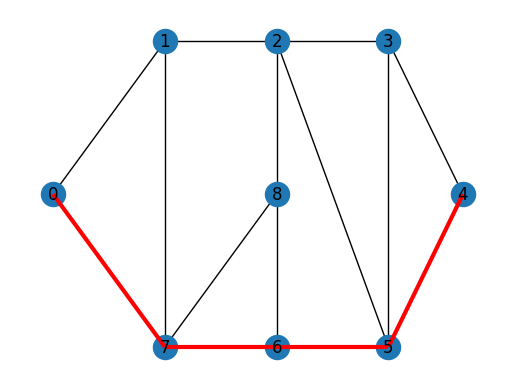

In [ ]:
# Se grafica la ruta óptima
import networkx as nx
from matplotlib import pyplot, collections
position = {'0': [0,0], '1': [3,1], '2': [6,1],'3': [9,1], '4': [11, 0], '5': [9,-1], '6': [6, -1], '7': [3, -1], '8': [6, 0]}
flow = [0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0]
G = nx.Graph()
# N = Conjunto de vértices de los nodos
N = ['0', '1', '2', '3', '4', '5', '6', '7', '8']

# C = Costo de cada enlace
C = {'0': {'1': 4, '7': 8},
     '1': {'0': 4, '2': 8, '7': 11},
     '2': {'1': 8, '3': 7, '5': 4, '8': 2},
     '3': {'2': 7, '4': 9, '5': 14},
     '4': {'3': 9, '5': 10},
     '5': {'2': 4, '3': 14, '4': 10, '6': 2},
     '6': {'5': 2, '7': 1, '8': 6},
     '7': {'0': 8, '1': 11, '6': 1, '8': 7},
     '8': {'2': 2, '6': 6, '7': 7}}

E = [(i,j) for i in N for j in N if i in C.keys() if j in C[i].keys()]
G.add_nodes_from(N)
G.add_edges_from(E)
fig, ax = pyplot.subplots()
nx.draw(G, pos=position, with_labels=True)
lines = []
for (i,j) in E:
    lines.append([(position[i][0], position[i][1]),(position[j][0], position[j][1])])
lc = collections.LineCollection(lines, linewidth=flow, colors='r')
ax.add_collection(lc)